# Function for drwaing plots

In [55]:
import json
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text
from collections.abc import Iterable
import os


plt.rcParams.update({
    "figure.figsize": (4, 1.5),
    #"figure.figsize": (4, 3),
    "figure.dpi": 300,
    "figure.autolayout": False,
    "text.usetex": True,
    'mathtext.fontset': 'stix',
    'font.family': 'STIXGeneral',
    'savefig.transparent': False,
})


def load_json(filepath):
    with open(filepath) as file:
        return json.load(file)


def plot_results(experiment, methods, x_axis, y_axis, k, seeds, x_axis_label, y_axis_label, title):
    texts = []
    x_rep = []
    y_rep = []

    fig = plt.figure()
    fig.patch.set_alpha(0)

    plt.clf()
    ax = plt.gca()
    ax.set_facecolor('white')

    for n, v in methods.items():
        x_vals = []
        y_vals = []
        x_errors = []
        y_errors = []
        for m, l in v.items():
            y = []
            x = []
            x_error = 0
            y_error = 0

            if isinstance(seeds, Iterable):
                for seed in seeds:
                    path1 = f"{experiment}{m.format(k, seed)}_results.json"
                    path2 = f"{experiment}{m}_k={k}_s={seed}_results.json"
                    if os.path.exists(path1):
                        path = path1
                    elif os.path.exists(path2):
                        path = path2
                    else:
                        print(f"Missing: {path1} / {path2}")
                        return

                    method = load_json(path)
                    x.append(method[x_axis])
                    y.append(method[y_axis])

            if isinstance(x, list):
                x = np.array(x) * 100
                x_error = np.std(x)
                x = np.mean(x)
            
            if isinstance(y, list):
                y = np.array(y) * 100
                y_error = np.std(y)
                y = np.mean(y)

            x_vals.append(x)
            y_vals.append(y)
            x_errors.append(x_error)
            y_errors.append(y_error)
            # plt.annotate(l, (x_val[-1] + 0.002, y_val[-1] + 0.004), 
            #              horizontalalignment='left',
            #              verticalalignment='bottom',
            #              clip_on=False)
            if l is not None:
                texts.append(plt.text(x_vals[-1], y_vals[-1], l, size=8))
                #texts.append(plt.text(x_val[-1] + 0.002, y_val[-1] + 0.004, l, size=7))
                x_rep.append(x_vals[-1])
                y_rep.append(y_vals[-1])
        x_vals = np.array(x_vals)
        y_vals = np.array(y_vals)
        x_errors = np.array(x_errors)
        y_errors = np.array(y_errors)
        plt.plot(x_vals, y_vals, '.', linestyle="-")
        #plt.fill_between(x=x_vals, y1 = y_vals - y_errors, y2= y_vals + y_errors, alpha=0.3)
        #plt.errorbar(x_vals, y_vals, xerr=x_errors, yerr=y_errors, fmt='.', linestyle="-", linewidth=1, capsize=2, capthick=1)

    adjust_text(texts, x_rep, y_rep, 
                min_arrow_len=50,
                #force_text=(0.2, 0.5),
                #force_static=(0.2, 0.5),
                #force_explode=(0.2, 0.5),
                #expand=(1.4, 1.6),
                time_lim=1, 
                explode_radius=100, 
                #expand_axes=True,
                #only_move = {"text": "y", "static": "y", "explode": "y", "pull": "y"},
                arrowprops={"arrowstyle": "->", "lw": 0.5},
                #force_text=(0.1, 0.5), # Since the movements are so contrained, high force speeds up the process a lot
                expand=(1.4, 1.5),
                only_move='y-', #Only allow movement to the left
                )
    #plt.legend()
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    # plt.ylim([0, 1])
    # plt.xlim([0, 1])
    #plt.title(f"{dataset.capitalize()}")
    plt.title(title)
    plt.margins(0.15, 0.25)
    plt.plot()
    plt.savefig(f"plots/{experiment.split('/')[-1]}_mixed_{x_axis.replace('@', '_')}_{y_axis.replace('@', '_')}.pdf", dpi=300, bbox_inches='tight')


# Block Coordinate Ascent

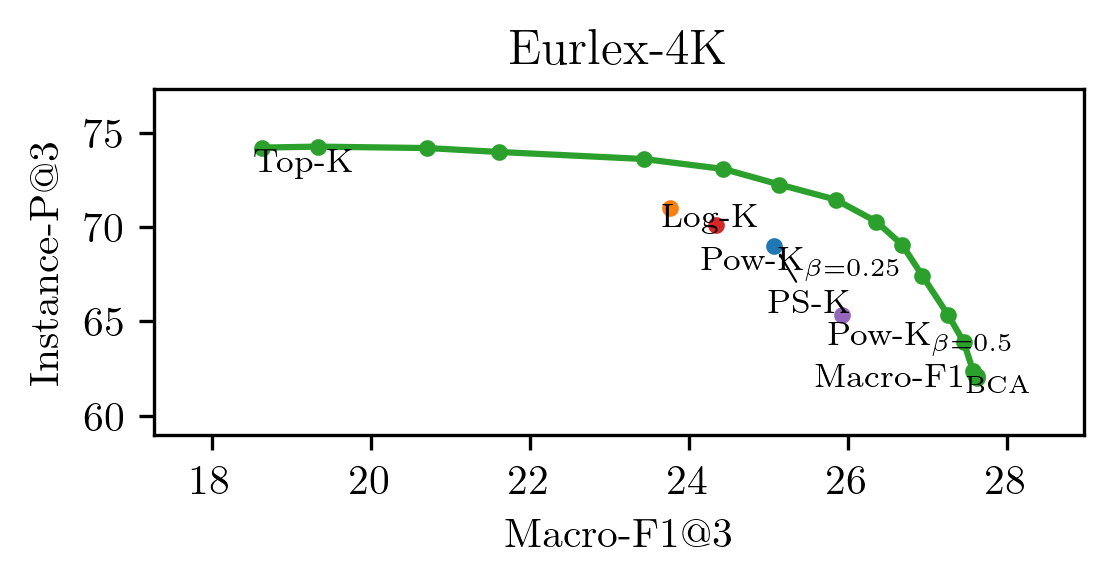

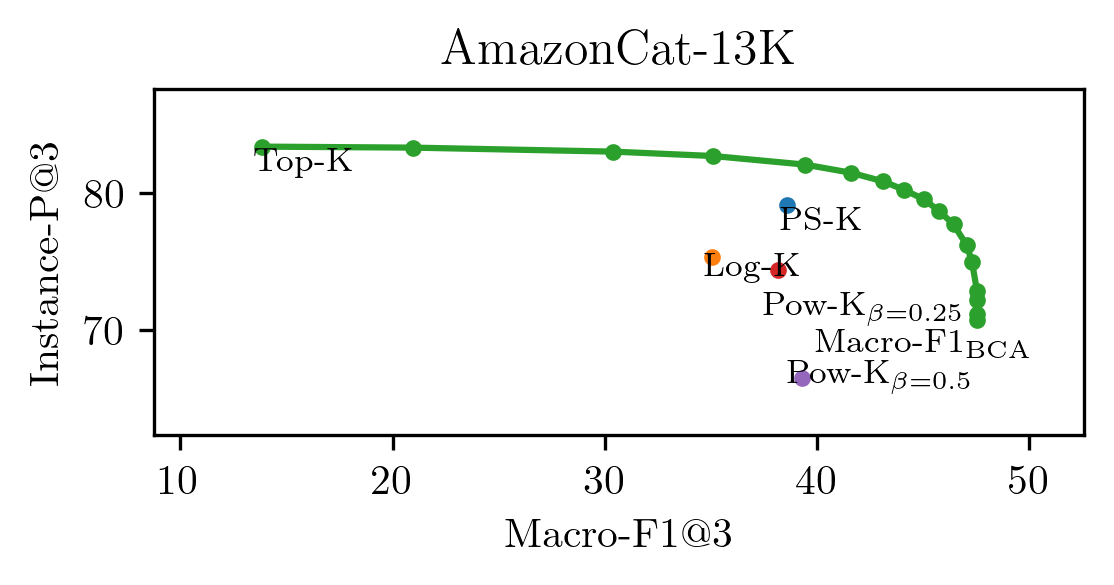

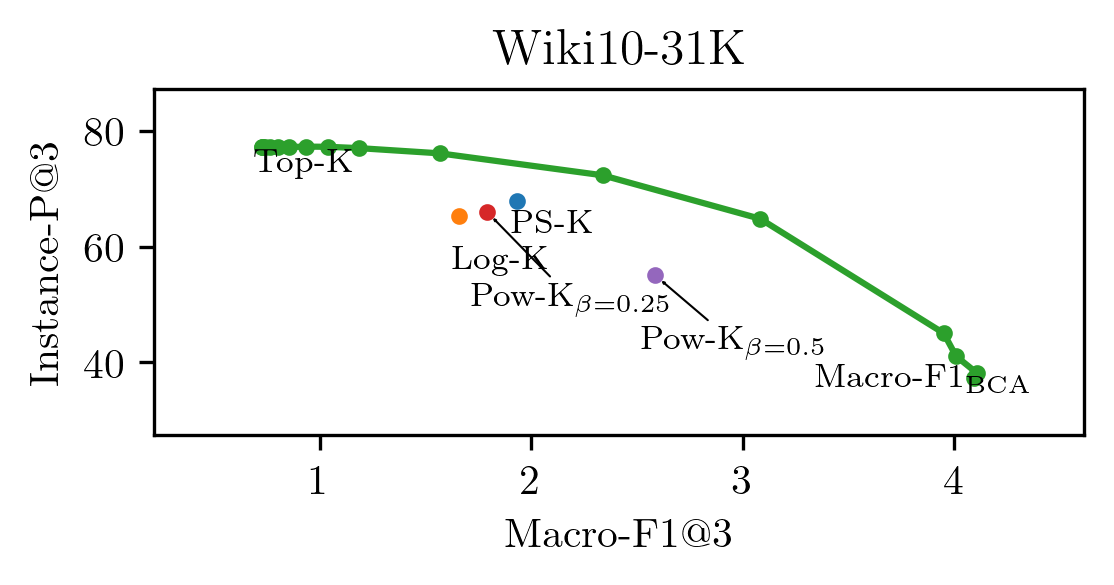

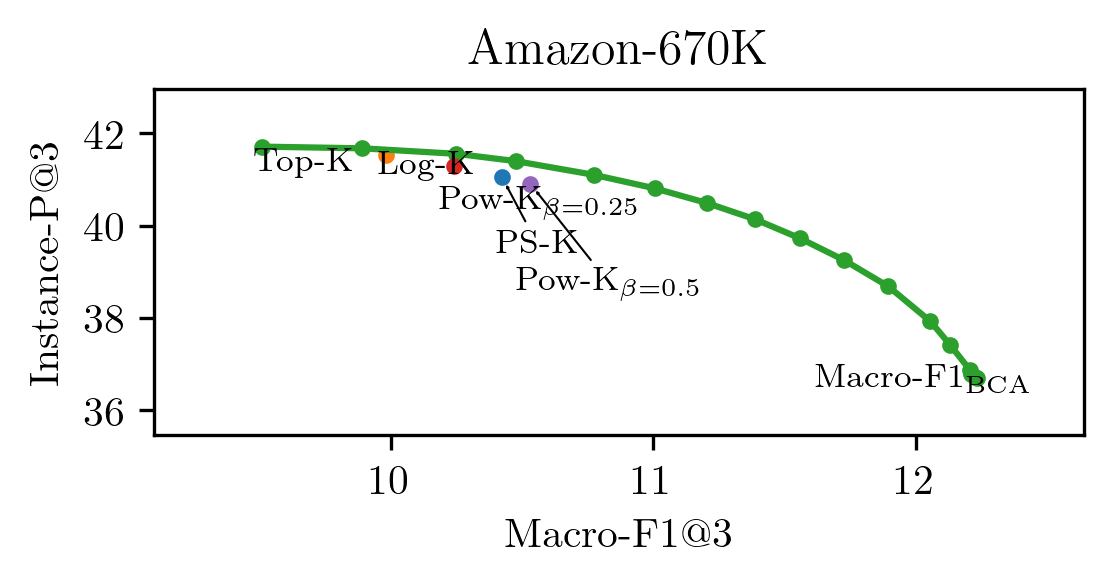

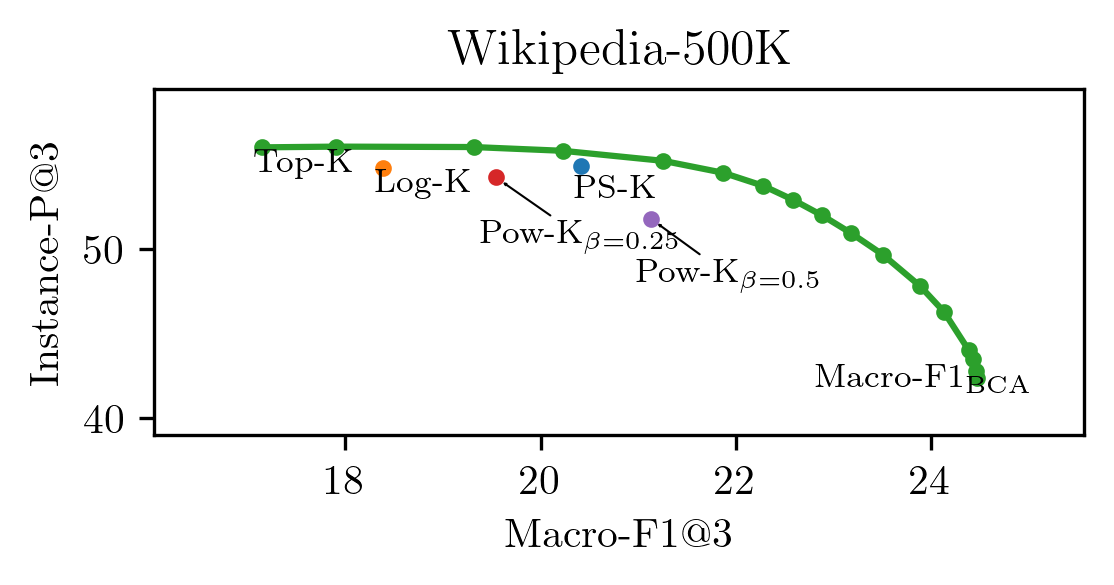

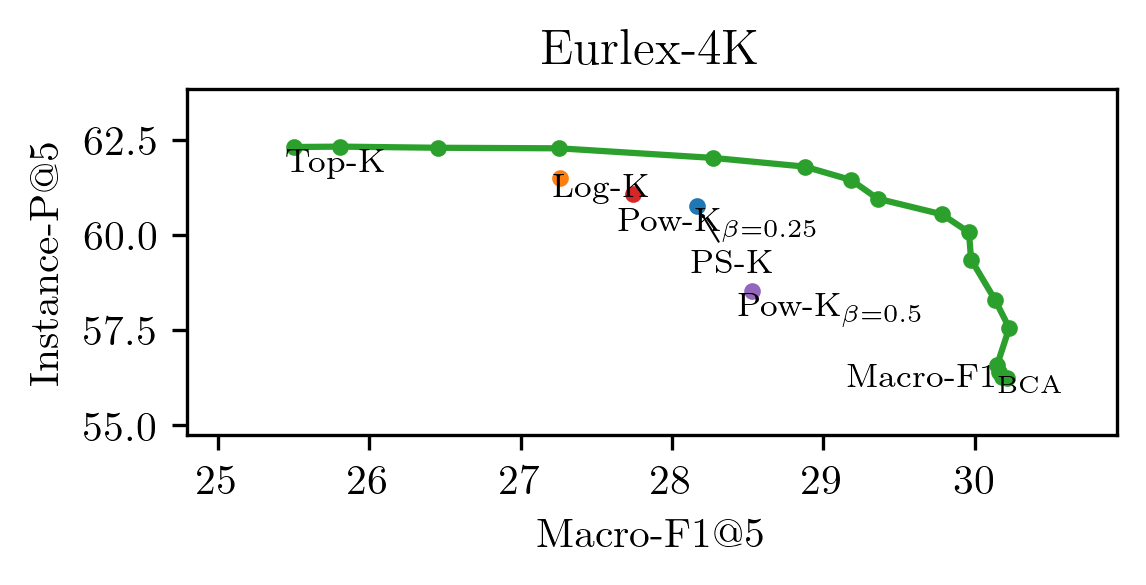

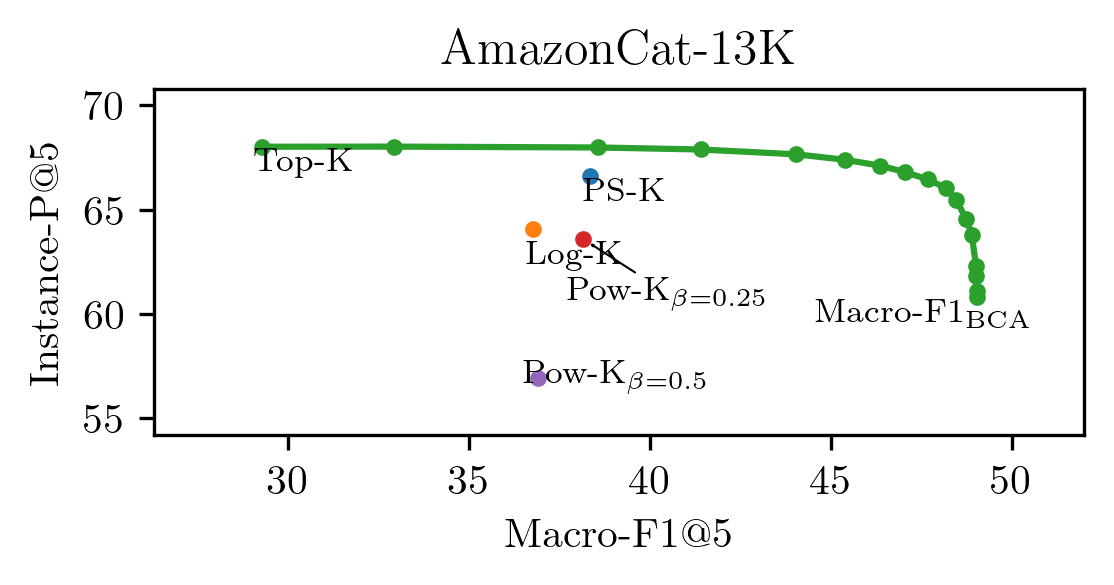

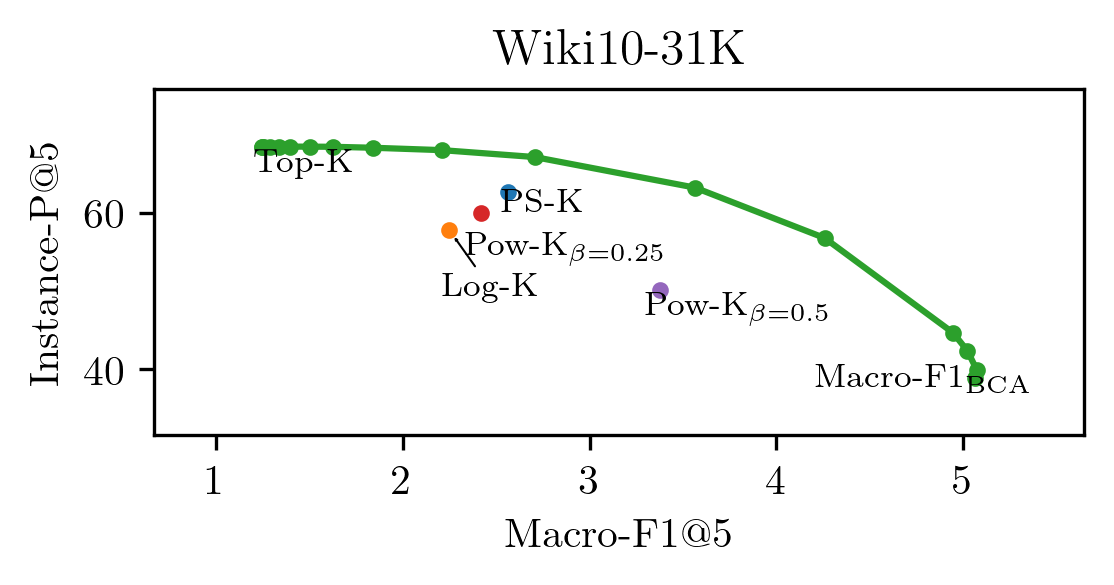

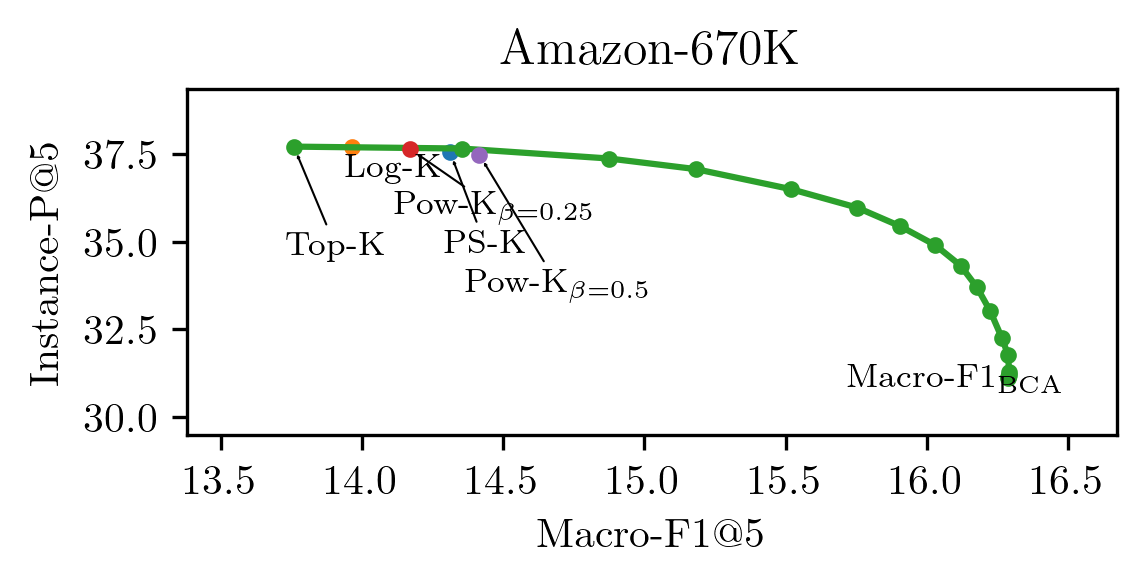

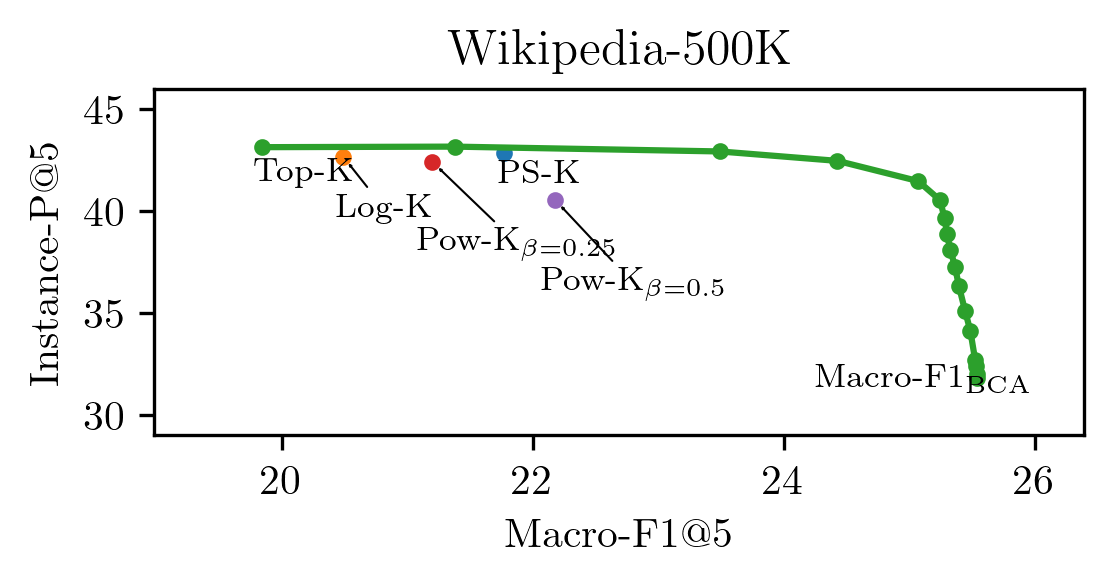

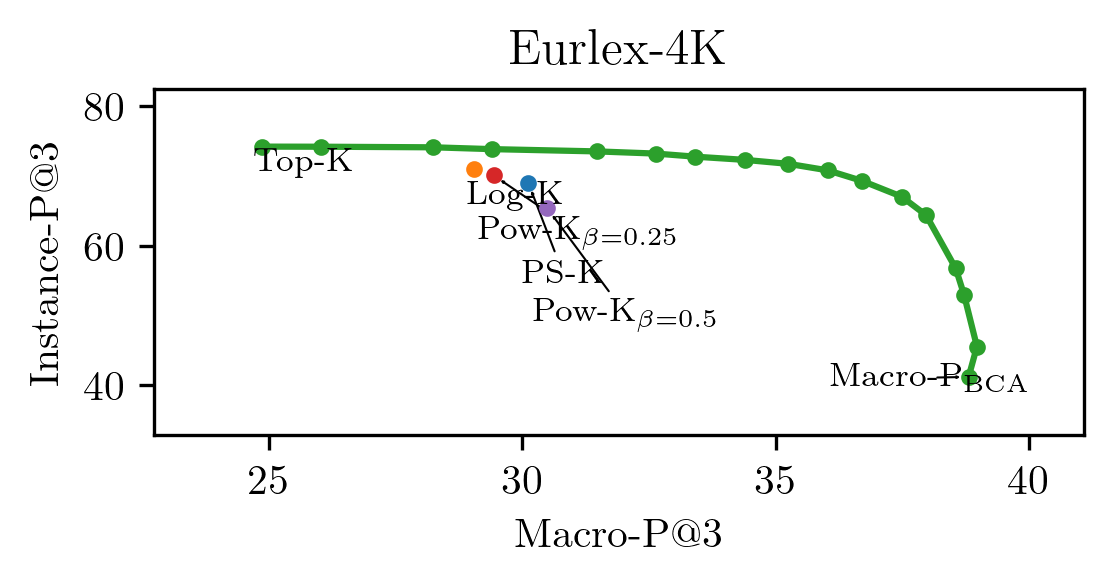

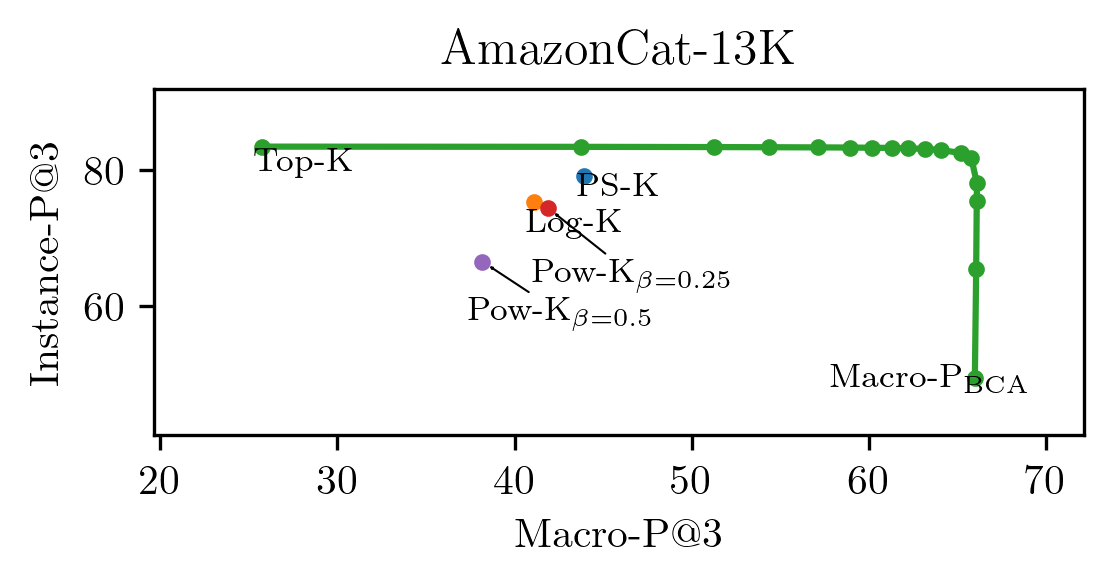

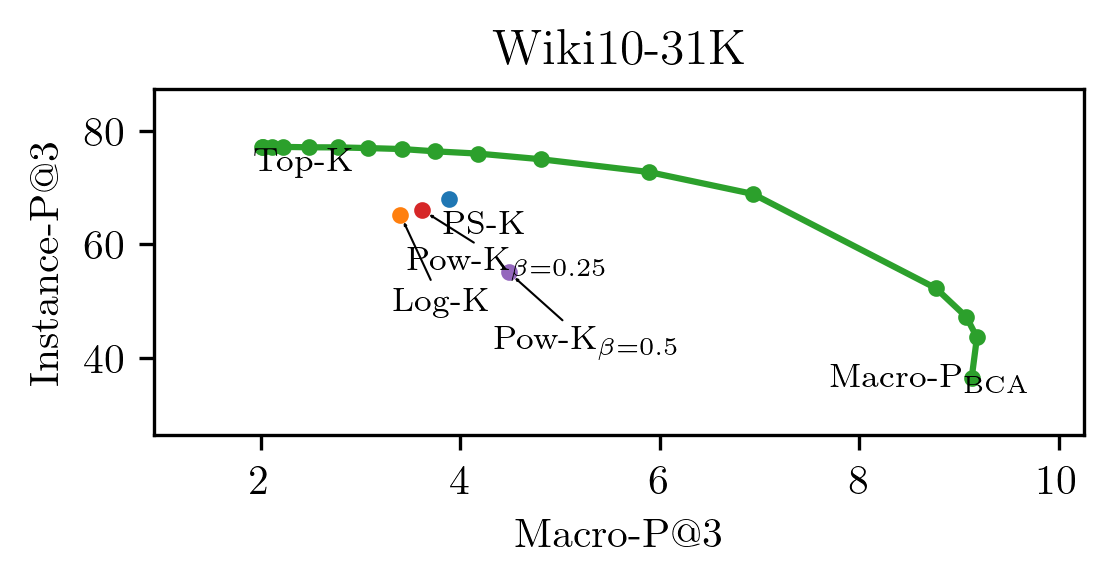

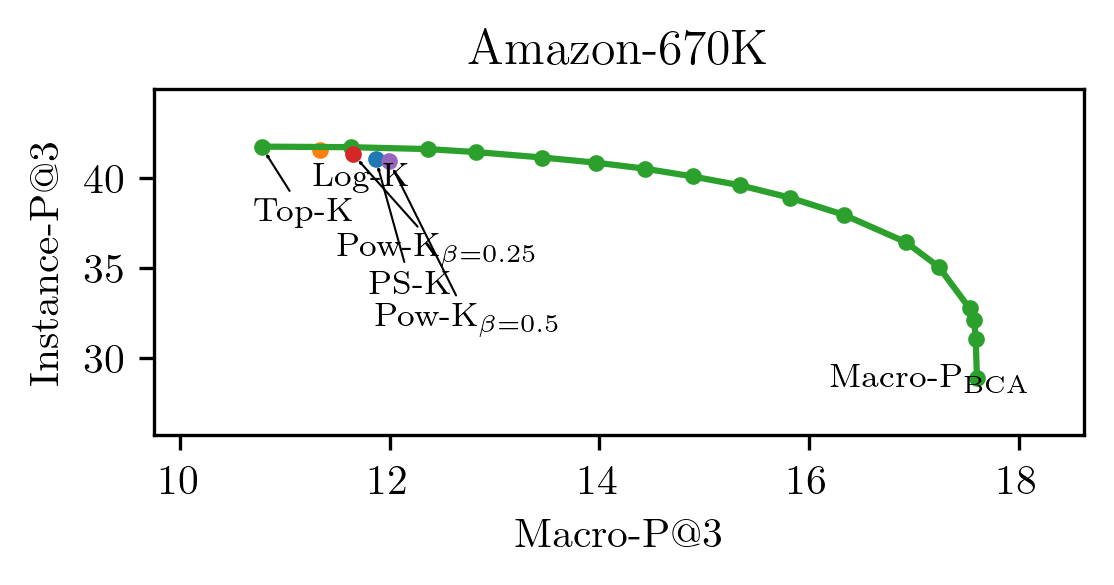

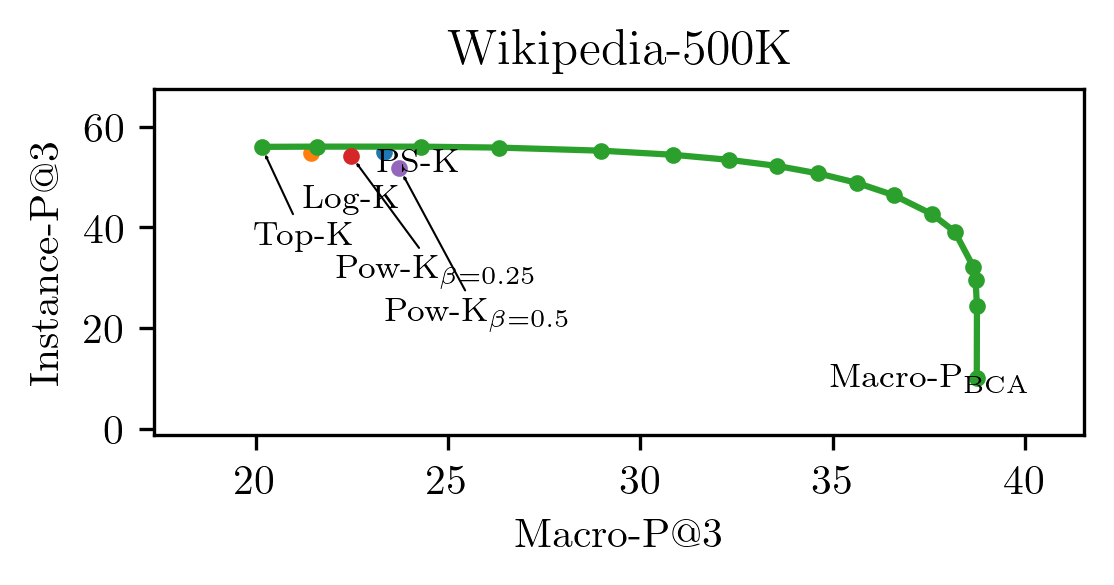

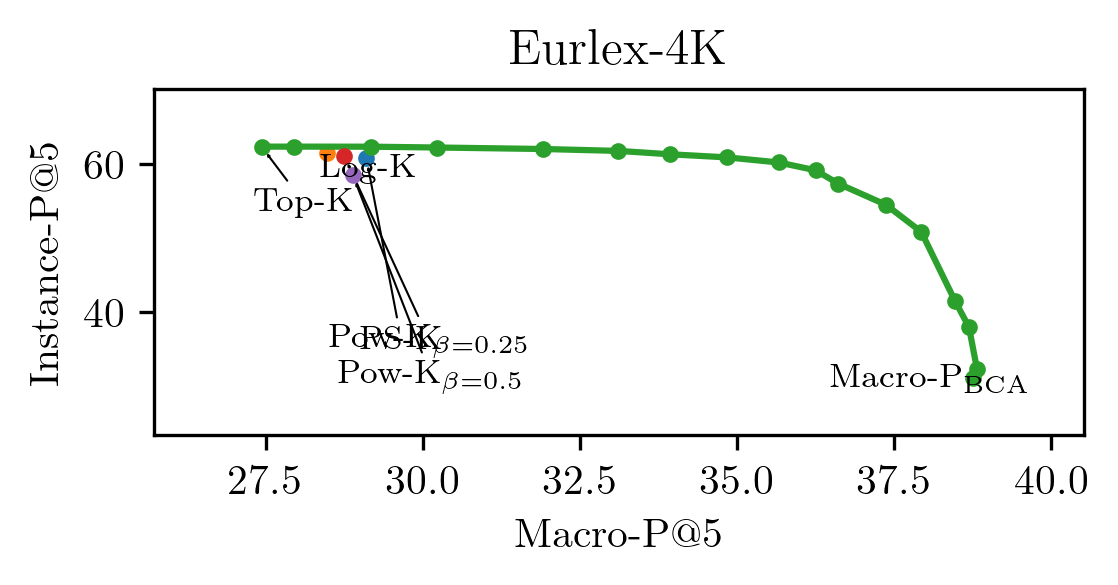

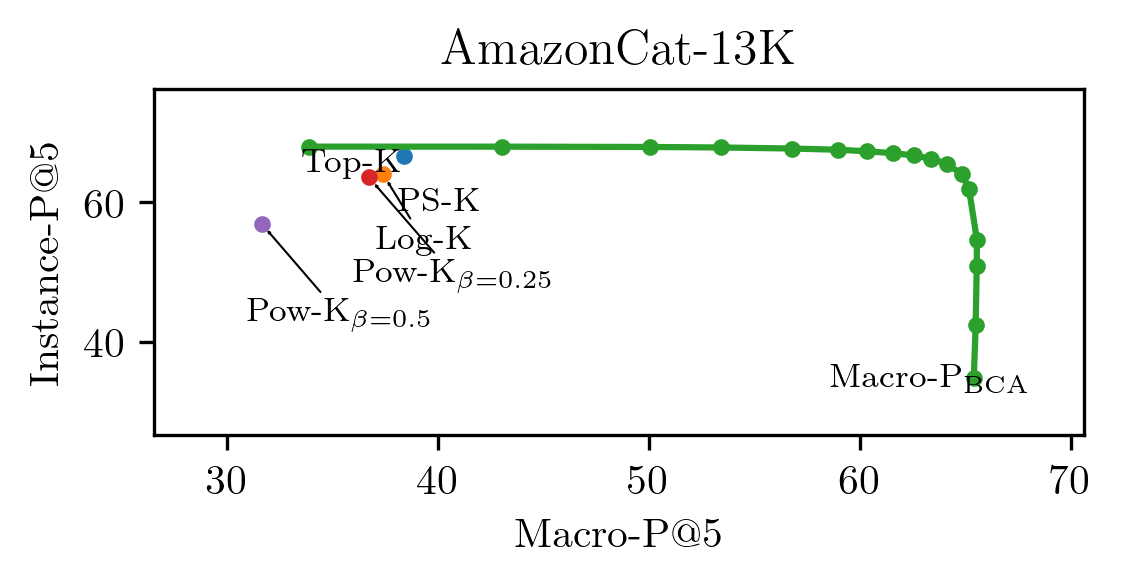

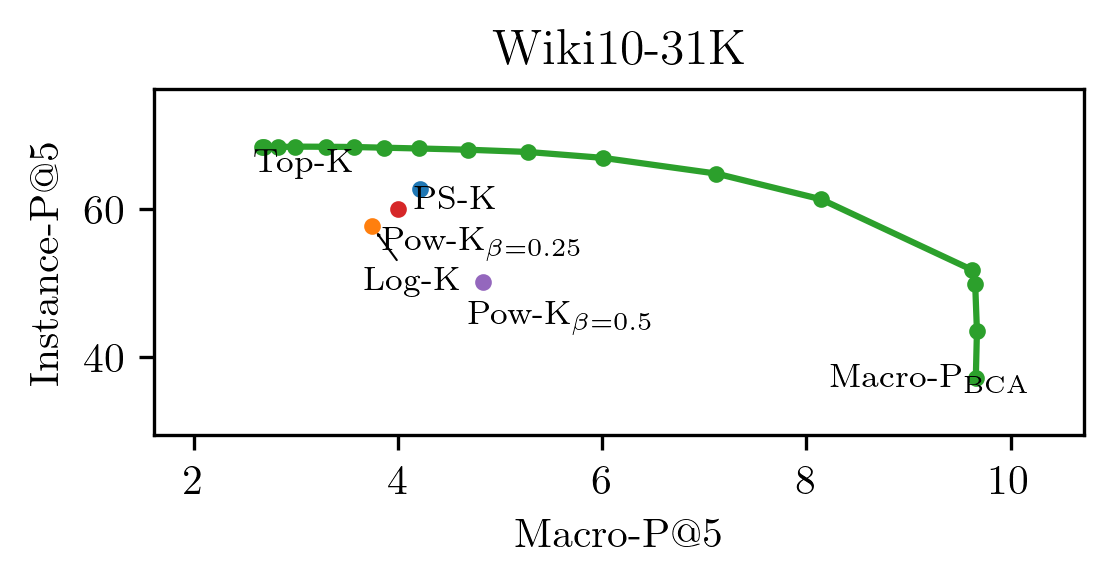

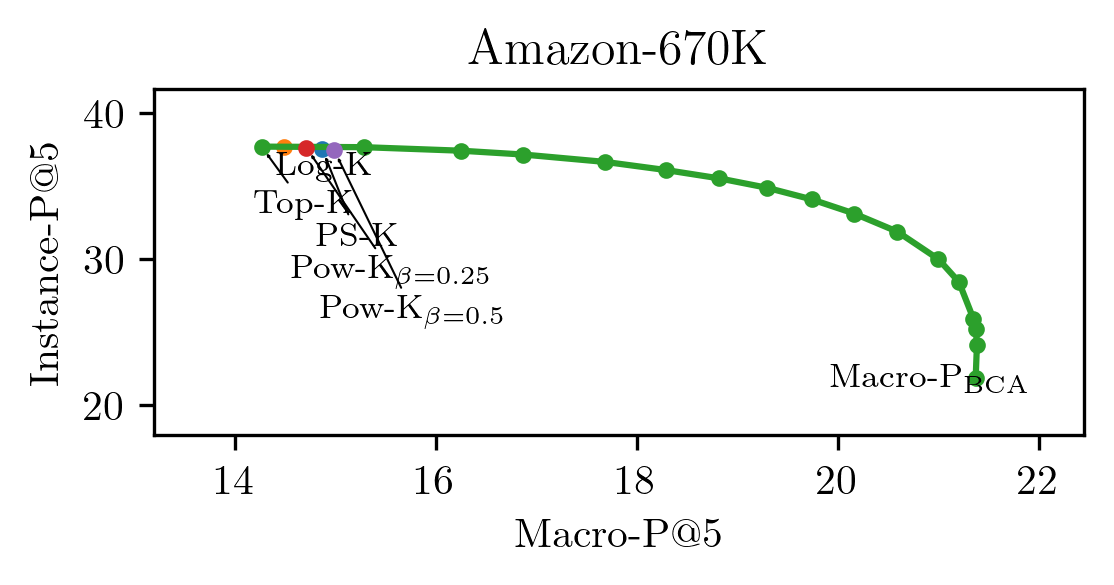

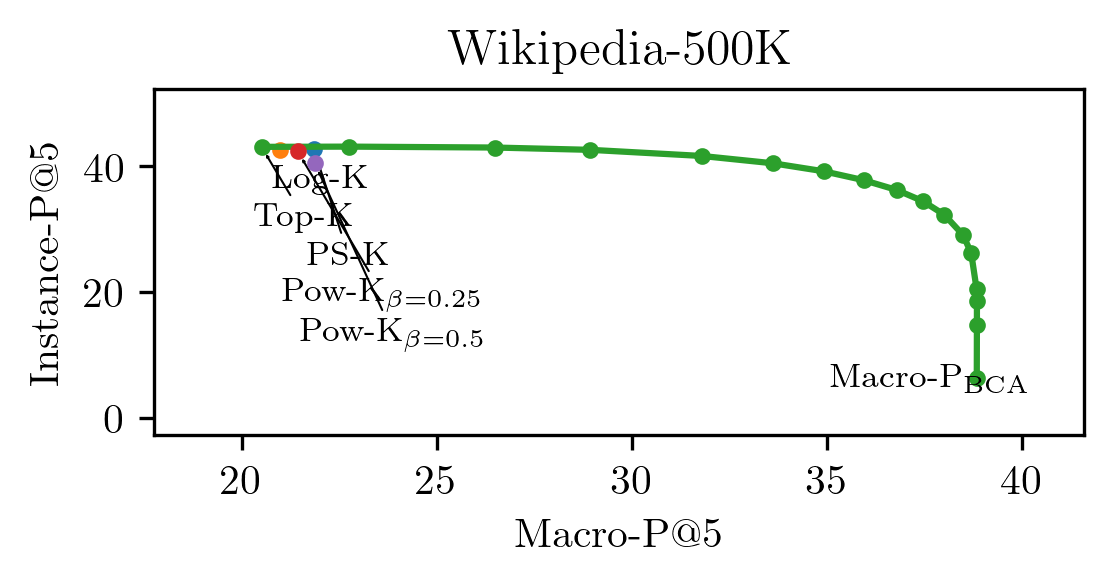

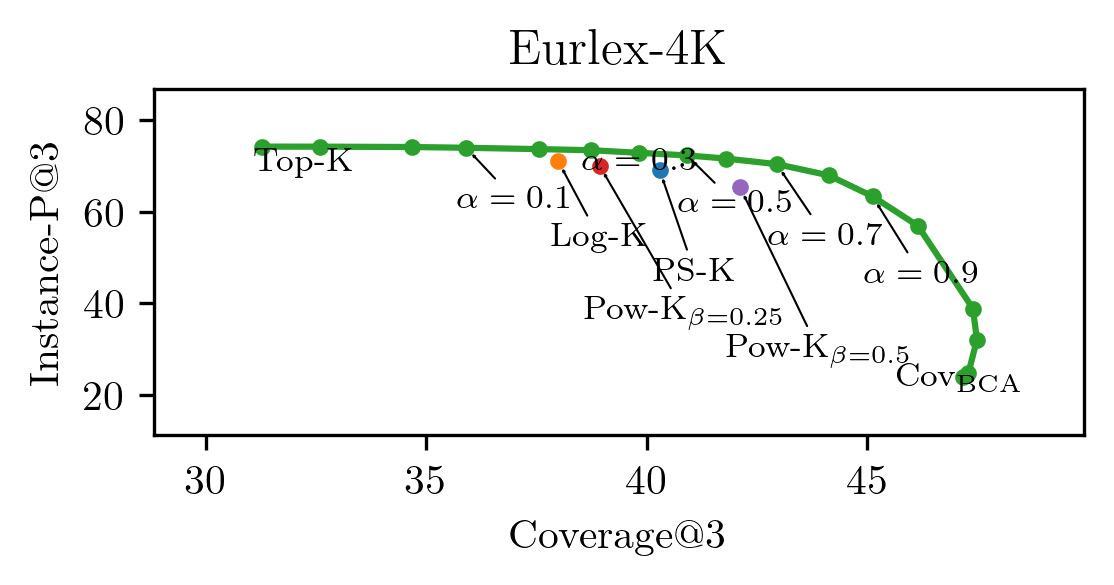

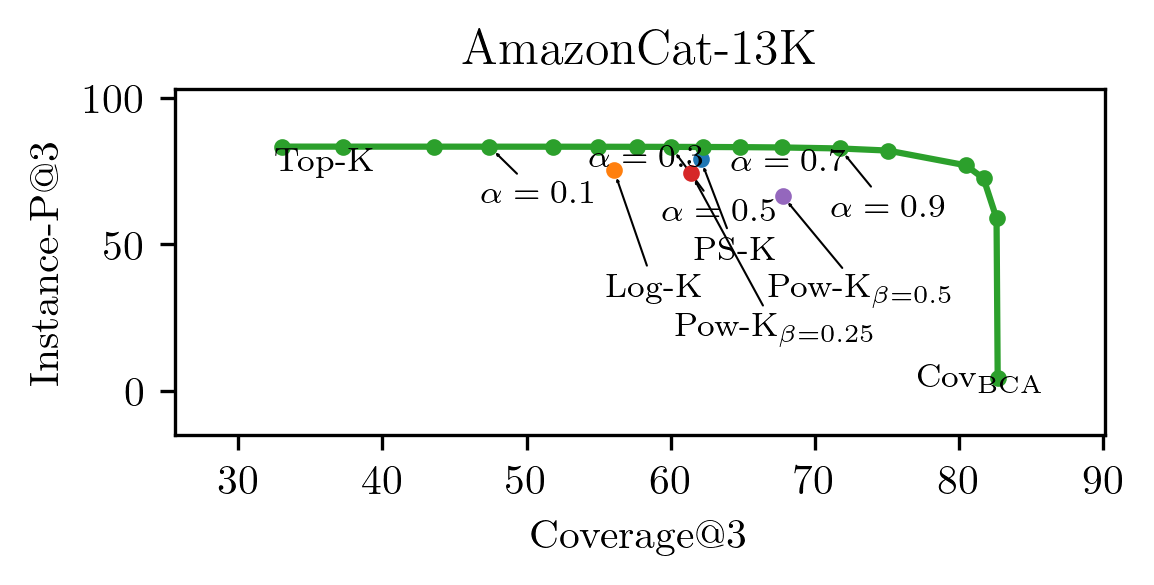

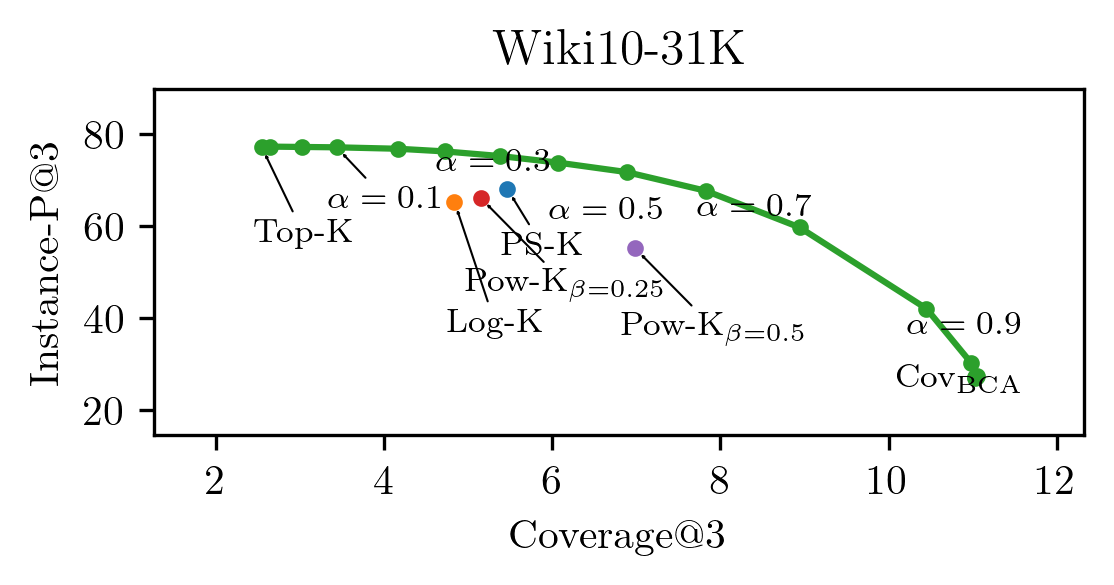

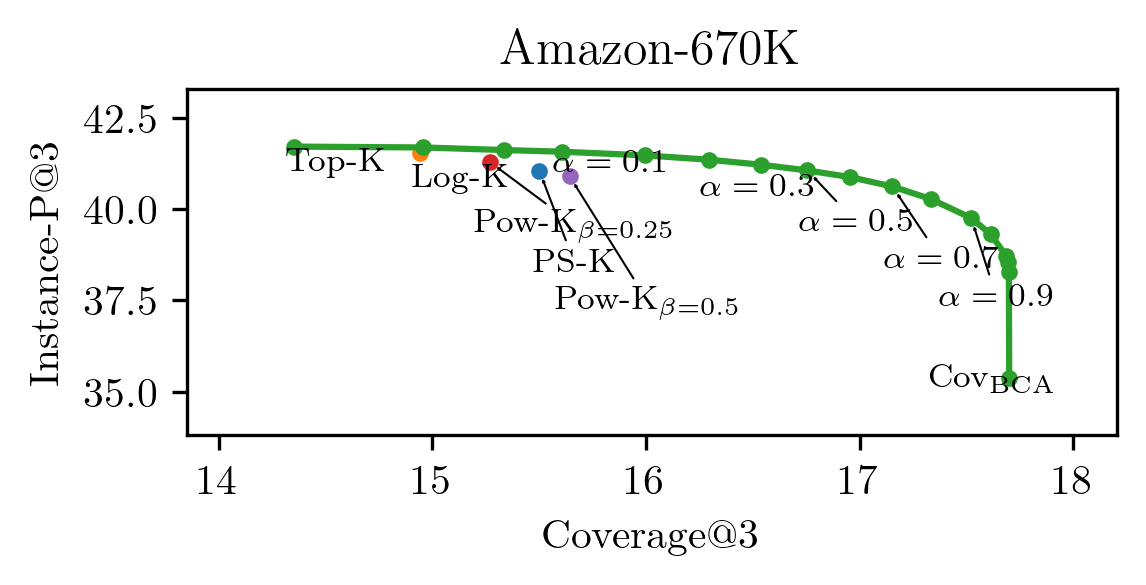

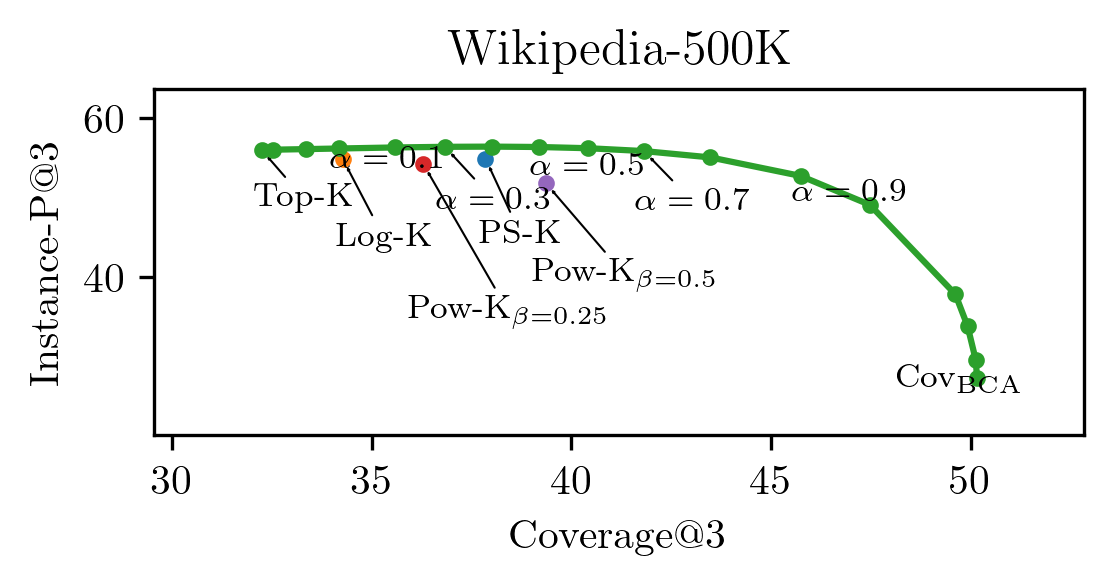

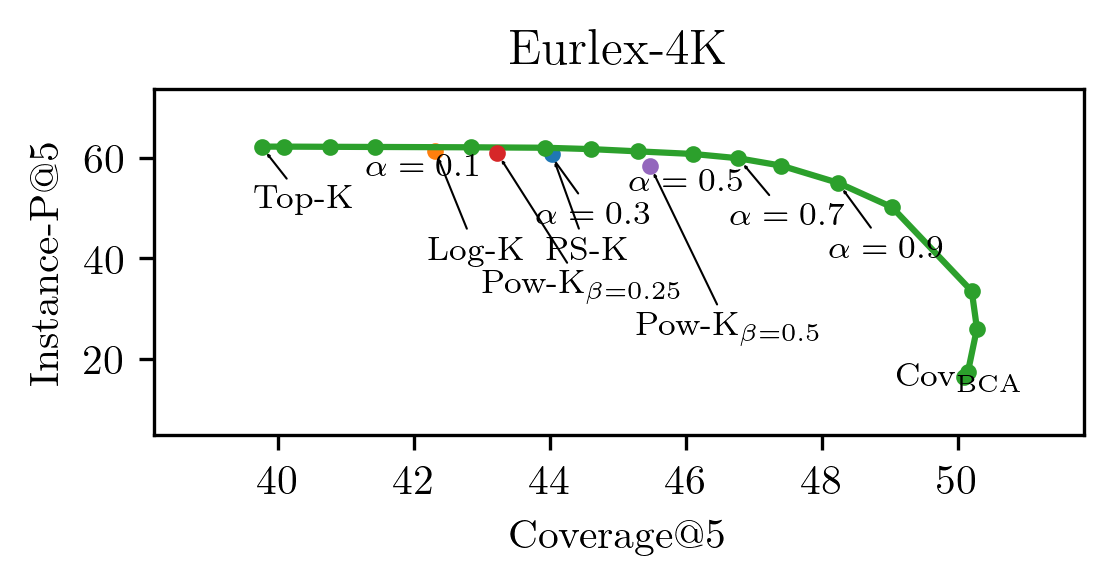

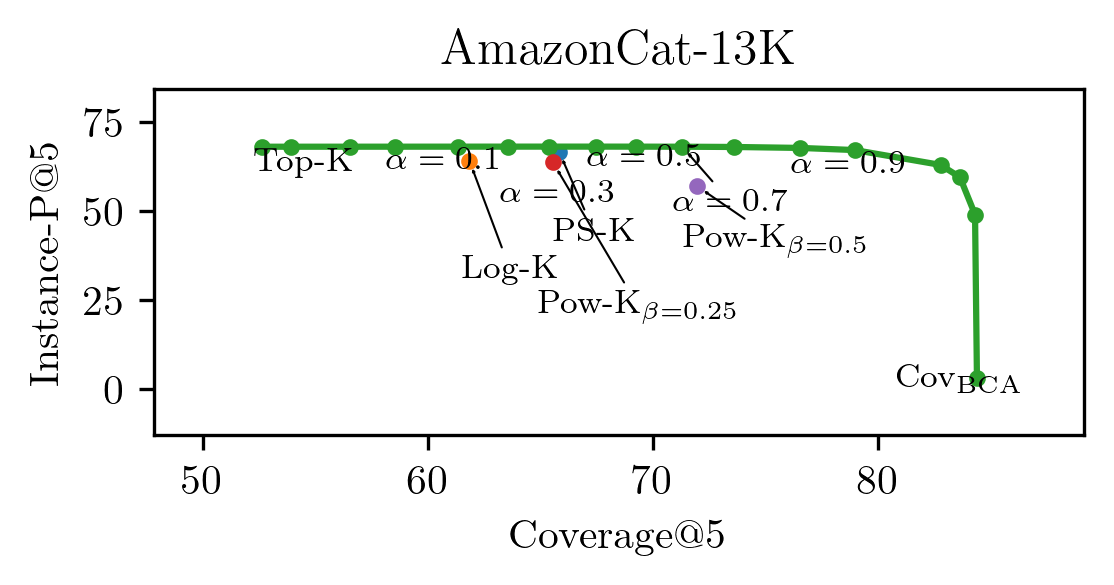

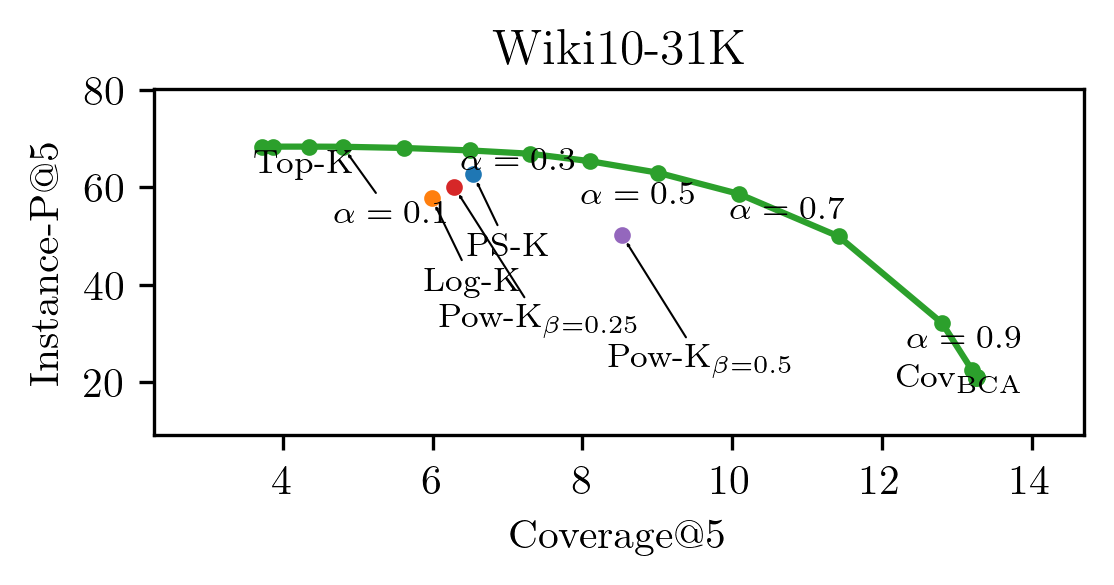

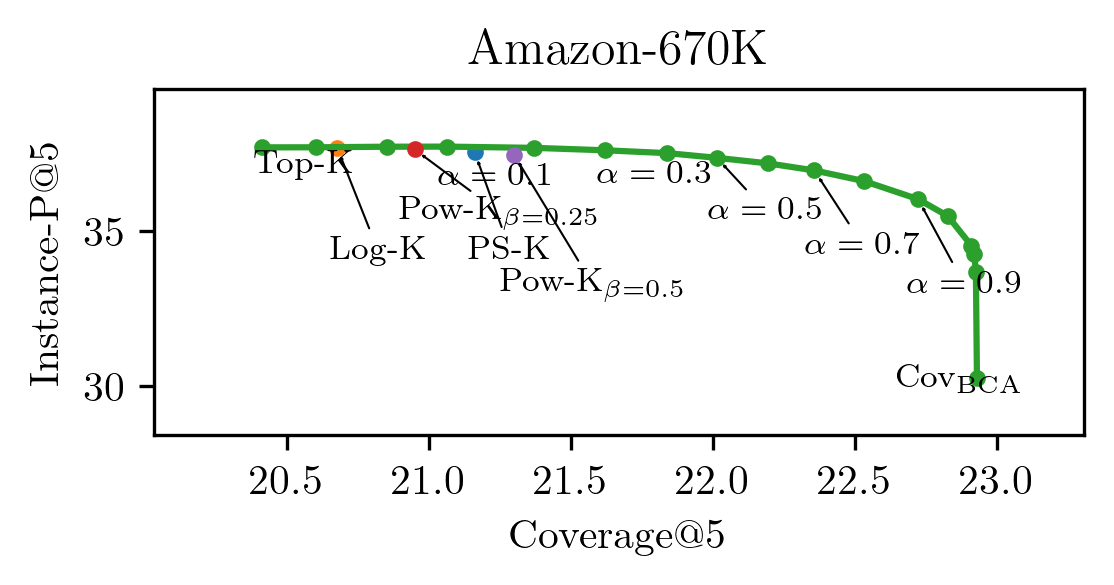

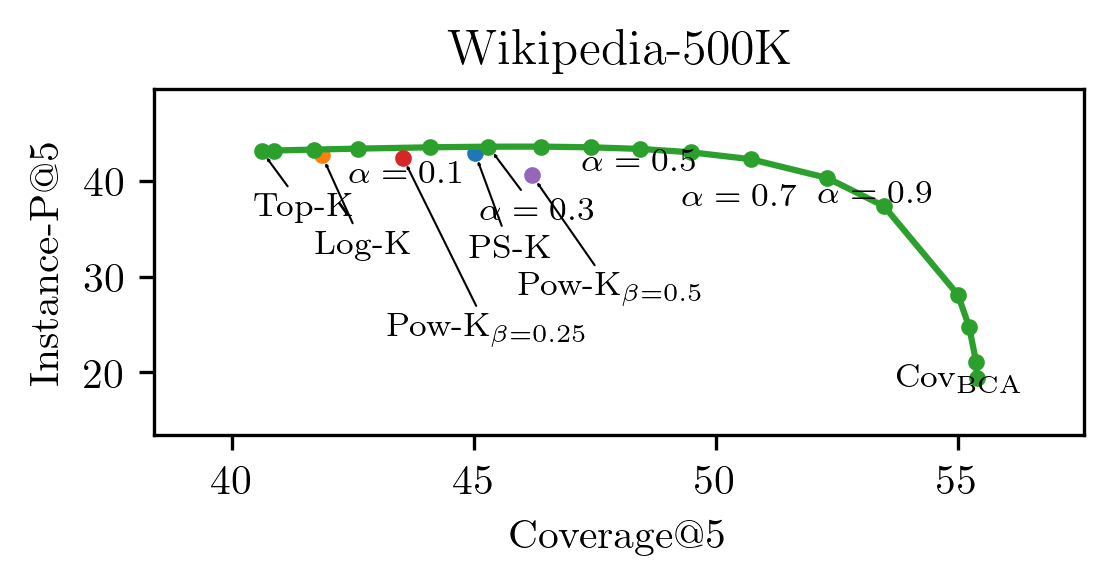

In [56]:
dataset_names = {
    "eurlex": "Eurlex-4K",
    "amazoncat": "AmazonCat-13K",
    "wiki10": "Wiki10-31K",
    "amazon_1000": "Amazon-670K",
    "wiki500_1000": "Wikipedia-500K",
}

seeds = [13, 26, 42, 1993, 2023]
directory = "../results_bca3"
tol="1e-6"

for macro_type in ["f1", "prec", "cov"]:
    for k in [3, 5]:
        x_axis = f"m{macro_type[0].upper()}@{k}"
        y_axis = f"iP@{k}"
        macro_type_label = macro_type[0].upper()
        if macro_type == "f1":
            macro_type_label = macro_type.upper()
        if macro_type == "cov":
            x_axis_label = f"Coverage@{k}"
        else:
            x_axis_label = f"Macro-{macro_type_label}@{k}"
        y_axis_label = f"Instance-P@{k}"

        if macro_type == "cov":
            methods = {
                "ps-k": {"_lightxml/optimal-instance-ps-prec": "PS-K"},
                "log": {"_lightxml/log": "Log-K"},
                f"mixed-tol={tol}": {
                    f"_lightxml/block-coord-{macro_type}-tol={tol}": f"Cov" + "$_{\\mathrm{BCA}}$",
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.999-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.995-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.99-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.95-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.9-tol={tol}": "$\\alpha=0.9$",
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.8-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.7-tol={tol}": "$\\alpha=0.7$",
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.6-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.5-tol={tol}": "$\\alpha=0.5$",
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.4-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.3-tol={tol}": "$\\alpha=0.3$",
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.2-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.1-tol={tol}": "$\\alpha=0.1$",
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.05-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.01-tol={tol}": None,
                    f"_lightxml/optimal-instance-prec": "Top-K",
                },
                "pow-beta=0.25": {"_lightxml/power-law-with-beta=0.25": "Pow-K$_{\\beta=0.25}$"},
                "pow-beta=0.5": {"_lightxml/power-law-with-beta=0.5": "Pow-K$_{\\beta=0.5}$"},
            }
        else:
            methods = {
                "ps-k": {"_lightxml/optimal-instance-ps-prec": "PS-K"},
                "log": {"_lightxml/log": "Log-K"},
                f"mixed-tol={tol}": {
                    f"_lightxml/block-coord-macro-{macro_type}-tol={tol}": f"Macro-{macro_type_label}" + "$_{\\mathrm{BCA}}$",
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.999-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.995-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.99-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.95-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.9-tol={tol}": "$\\alpha=0.9$",
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.8-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.7-tol={tol}": "$\\alpha=0.7$",
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.6-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.5-tol={tol}": "$\\alpha=0.5$",
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.4-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.3-tol={tol}": "$\\alpha=0.3$",
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.2-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.1-tol={tol}": "$\\alpha=0.1$",
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.05-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.01-tol={tol}": None,
                    f"_lightxml/optimal-instance-prec": "Top-K",
                },
                "pow-beta=0.25": {"_lightxml/power-law-with-beta=0.25": "Pow-K$_{\\beta=0.25}$"},
                "pow-beta=0.5": {"_lightxml/power-law-with-beta=0.5": "Pow-K$_{\\beta=0.5}$"},
            }

            methods = {
                "ps-k": {"_lightxml/optimal-instance-ps-prec": "PS-K"},
                "log": {"_lightxml/log": "Log-K"},
                f"mixed-tol={tol}": {
                    f"_lightxml/block-coord-macro-{macro_type}-tol={tol}": f"Macro-{macro_type_label}" + "$_{\\mathrm{BCA}}$",
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.999-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.995-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.99-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.95-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.9-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.8-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.7-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.6-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.5-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.4-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.3-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.2-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.1-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.05-tol={tol}": None,
                    f"_lightxml/block-coord-mixed-prec-{macro_type}-alpha=0.01-tol={tol}": None,
                    f"_lightxml/optimal-instance-prec": "Top-K",
                },
                "pow-beta=0.25": {"_lightxml/power-law-with-beta=0.25": "Pow-K$_{\\beta=0.25}$"},
                "pow-beta=0.5": {"_lightxml/power-law-with-beta=0.5": "Pow-K$_{\\beta=0.5}$"},
            }


        for dataset, title in dataset_names.items():
            
            plot_results(f"{directory}/{dataset}", methods, x_axis, y_axis, k, seeds, x_axis_label, y_axis_label, title)
            plt.show()

In [ ]:
plt.rcParams.update({
    "figure.figsize": (4, 1.5),
    "figure.dpi": 300,
    "figure.autolayout": False,
    "text.usetex": True,
    'mathtext.fontset': 'stix',
    'font.family': 'STIXGeneral',
    'savefig.transparent': False,
})